# 1. Generate 100 real number for the variable X from the uniform distribution U [0, 1].

# 2. Construct the training set T = { ($x_1$,$y_1$), ($x_2$,$y_2$), ... , ($x_{100}$,$y_{100}$)} using the relation

# $Y_i$ = sin(2 π $x_i$) + $ε_i$ where $ε_i$ ~ N(0,0.25).

# In the similar way construct a testing set of size 50 Test = { ($x'_1$,$y'_1$),($x'_2$,$y'_2$),......,($x'_{50}$,$y'_{50}$)}.

Text(0.5, 1.0, 'Testing Data')

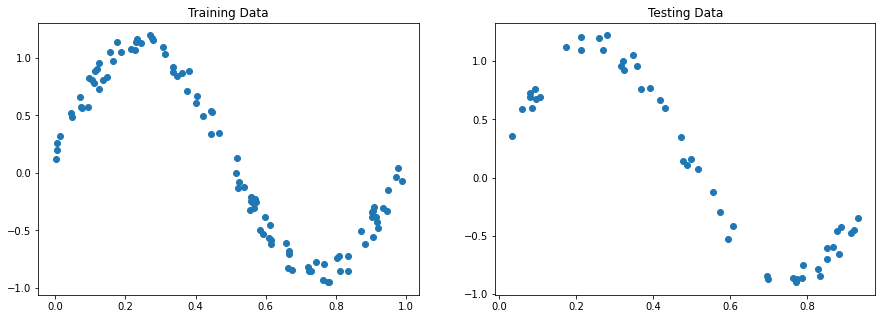

In [83]:
import pandas as pd
import random as random
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm


# Train data

# Uniform distribution of training data
X_train = np.random.uniform(0, 1, 100)

Y_train = []
for xval in X_train:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_train.append(res)



# Test data

# Uniform distribution of testing data
X_test = np.random.uniform(0, 1, 50)

Y_test = []
for xval in X_test:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_test.append(res)


# Plotting the graph of train and test data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X_train, Y_train)
ax[0].set_title('Training Data')
ax[1].scatter(X_test, Y_test)
ax[1].set_title('Testing Data')

# 3. Estimate the regularized Least Squares Polynomial Regression model of order M= 9, using the training set T using direct method. You also need to tune the regularization parameter λ which corresponds to minimum RMSE. After tuning the parameter λ, evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

## NOTE: Tuning for λ = 0.1, 0.05, $2^{-7}$, 0.0002 values.

In [84]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset)

reg_LSP_ord_9 = np.array(regularized_LSPR(X_train, Y_train, 9, 0))
reg_LSP_ord_9_1 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.1))
reg_LSP_ord_9_05 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.05))
reg_LSP_ord_9_27 = np.array(regularized_LSPR(X_train, Y_train, 9, math.pow(2, -7)))
reg_LSP_ord_9_0002 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.0002))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_1}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_05}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_27}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_0002}')

coefficient value with regularization and λ = 0: [[ 0.78341676  0.80183517 -3.23701712 -2.07321679 -0.44905135  0.61939538
   1.11693804  1.21143144  1.05795121  0.76676459]]
coefficient value with regularization and λ = 1: [[ 0.69317388  1.71671541 -4.5815429  -2.59528452 -0.12514532  1.28813658
   1.7174912   1.49349962  0.89682332  0.11814956]]
coefficient value with regularization and λ = 2^-7: [[  0.39200287   5.08025944 -10.42319121  -4.23038433   2.06009416
    4.72633392   4.44499431   2.40710631  -0.48399233  -3.66047502]]
coefficient value with regularization and λ = 2^-7: [[  0.14341361   8.03339032 -15.82428968  -6.67975834   6.20585697
    9.36471515   5.85407668   0.61783891  -3.25654789  -4.47385168]]


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

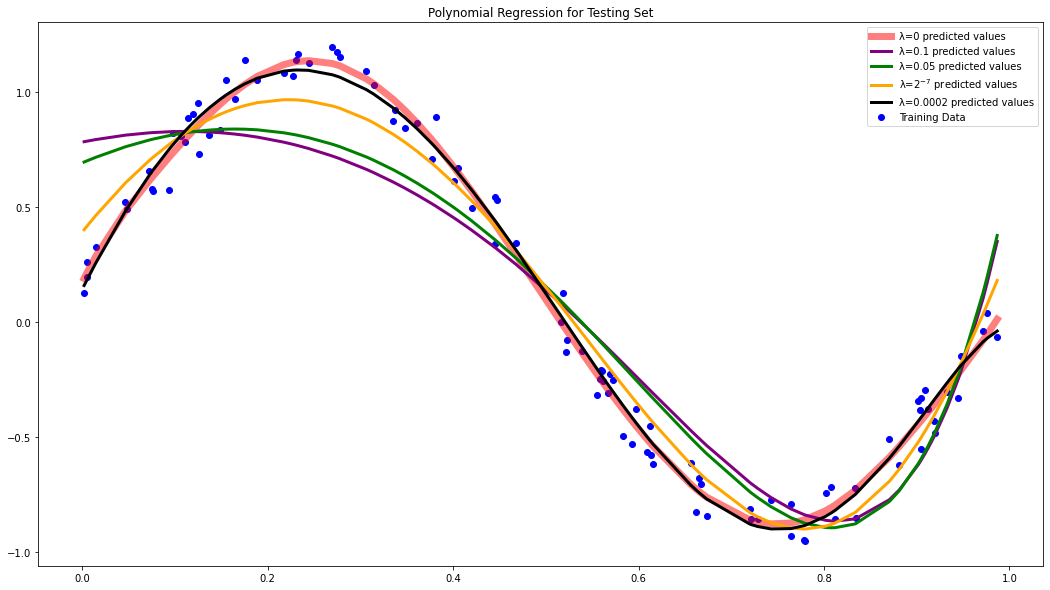

In [85]:
y_predicted_m9, y_predicted_m9_1, y_predicted_m9_05, y_predicted_m9_27, y_predicted_m9_0002 = [], [], [], [], []
X = X_train

for val in X:
  y_val = 0
  y1_val = 0
  y05_val = 0
  y27_val = 0
  y0002val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9[0][deg] * math.pow(val, deg)
    y1_val += reg_LSP_ord_9_1[0][deg] * math.pow(val, deg)
    y05_val += reg_LSP_ord_9_05[0][deg] * math.pow(val, deg)
    y27_val += reg_LSP_ord_9_27[0][deg] * math.pow(val, deg)
    y0002val += reg_LSP_ord_9_0002[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)
  y_predicted_m9_1.append(y1_val)
  y_predicted_m9_05.append(y05_val)
  y_predicted_m9_27.append(y27_val)
  y_predicted_m9_0002.append(y0002val)

# Sorting the data to plot line graph
df_predicted_m9 = pd.DataFrame(data=(X, y_predicted_m9),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_1 = pd.DataFrame(data=(X, y_predicted_m9_1),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_05 = pd.DataFrame(data=(X, y_predicted_m9_05),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_27 = pd.DataFrame(data=(X, y_predicted_m9_27),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_0002 = pd.DataFrame(data=(X, y_predicted_m9_0002),index=['X', 'Y_predicted']).T.sort_values(by='X')


# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 1, figsize=(18, 10))
axes.scatter(X_train, Y_train, color='blue')
axes.plot(df_predicted_m9['X'], df_predicted_m9['Y_predicted'], color='red', linewidth=7, alpha=0.5)
axes.plot(df_predicted_m9_1['X'], df_predicted_m9_1['Y_predicted'], color='purple', linewidth=3)
axes.plot(df_predicted_m9_05['X'], df_predicted_m9_05['Y_predicted'], color='green', linewidth=3)
axes.plot(df_predicted_m9_27['X'], df_predicted_m9_27['Y_predicted'], color='orange', linewidth=3)
axes.plot(df_predicted_m9_0002['X'], df_predicted_m9_0002['Y_predicted'], color='black', linewidth=3)
axes.legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.05 predicted values', 'λ=$2^{-7}$ predicted values', 'λ=0.0002 predicted values', 'Training Data'])
axes.set_title('Polynomial Regression for Testing Set')

## NMSE (Normalized Mean Square Error)

In [86]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ1'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ1'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ1'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ1 = 0

rmse_m9_λ1 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ1

0.22355944550532048

In [87]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ05'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ05'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ05'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ05 = 0

rmse_m9_λ05 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ05

0.22333635719912806

In [88]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ2^-7'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ2^-7'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ1 = 0

rmse_m9_λ1 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ1

0.20908599757168855

In [89]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ0002'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ0002'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ0002'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ0002 = 0

rmse_m9_λ0002 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ0002

0.19984373346197917

## RMSE (Root Mean Square error)

In [90]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_test),index=['y predicted m9 λ1','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ1 = 0

rmse_m9_λ1 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ1 = math.sqrt(rmse_m9_λ1)
rmse_m9_λ1

0.6397370108533159

In [91]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_test),index=['y predicted m9 λ05','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ05 = 0

rmse_m9_λ05 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ05 = math.sqrt(rmse_m9_λ05)
rmse_m9_λ05

0.644354208709113

In [92]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_test),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ27 = 0

rmse_m9_λ27 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27 = math.sqrt(rmse_m9_λ27)
rmse_m9_λ27

0.6660850862338152

In [93]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_test),index=['y predicted m9 λ0002','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0002 = 0

rmse_m9_λ0002 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0002 = math.sqrt(rmse_m9_λ0002)
rmse_m9_λ0002

0.6914924655439924

## MAE (Mean Absolute Error)

In [94]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ1 = 0
rmse_m9_λ1 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ1

0.7091338109281247

In [95]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ05 = 0
rmse_m9_λ05 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ05

0.7141495855436643

In [96]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ27 = 0
rmse_m9_λ27 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27

0.7136512095656313

In [97]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ0002 = 0
rmse_m9_λ0002 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0002

0.7167600678884201

## R2 (R-square Error)

### R2= 1 − $\frac{sum \; squared \; regression \; (SSR)}{total \; sum \; of \; squares \; (SST)}$


### R2 = $1− \frac{∑(y_i− \bar{y_i})^2}{∑(y_i−\bar{y})^2}$

In [98]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ1 = SSR/SST
R_square_λ1

0.5971874905690416

In [99]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ05 = SSR/SST
R_square_λ05

0.5871832794632598

In [100]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ27','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ27'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

0.5705498161258589

In [101]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

0.5530416558296753

# 4. Estimate the regularized Least Squares Polynomial Regression model of order M= 9, on the training set T using gradient descent method with the tuned value of λ obtained in question 3 by selecting an appropriate step length η. Compare the solution obtained by direct method and gradient descent method. Evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

## In polynomial regression, the coefficients of our $9^{th}$ degree polynomial, $w_0$, $w_1$, $w_2$, $w_3$, $w_4$, $w_5$, $w_6$, $w_7$, $w_9$, $w_{10}$ will be estimated, evaluated and altered until we can accurately fit a line to the input x data. Gradient descent is the optimization step in this process that alters and improves on the values of these coefficients.

## We can start be choosing coefficients for a $9^{th}$ degree polynomial equation ($w_0$ + $w_1$$x$ + $w_2$$x^2$ + $w_3$$x^3$ + $w_4$$x^4$ + $w_5$$x^5$ + $w_6$$x^6$ + $w_7$$x^7$ + $w_8$$x^8$ + $w_9$$x^9$ ) that will distribute the data we will try to model. These will be the coefficients for our base/ground truth model we hope to get our predictive model as close as possible to.

 
0


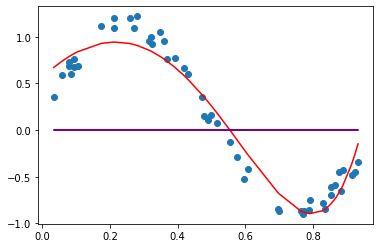

In [102]:
co = 9
A = np.vander(X_test, co, increasing = True)
A_trans = np.transpose(A)

I = np.identity(co, dtype = float)
alpha = 1/(2**7)


A_trans_A = np.dot(A_trans, A)

for i in range(len(A_trans_A)):
  for j in range(len(A_trans_A[0])):
    A_trans_A[i][j] = A_trans_A[i][j] + (alpha*I[i][j])

A_trans_A_inv = np.linalg.inv(A_trans_A)

c = np.dot(A_trans_A_inv, np.dot(A_trans,Y_test))

coefficient = []
for i in c:
    coefficient.append(i)

coefficient = coefficient[::-1]
coefficient = np.array(coefficient)
coefficient = coefficient.ravel()
f = np.poly1d(coefficient)
# print(f)

y_pred = []
for i in range(len(X_test)):
  y_pred.append(f(X_test[i]))

test_pd1 = pd.DataFrame(data = [X_test, y_pred], index=['x', 'y']).T.sort_values(by='x')

plt.scatter(X_test,Y_test)
plt.plot(test_pd1['x'] ,test_pd1['y'] ,color="red")

init_coeff = [0,0,0,0,0,0,0,0,0]
new_f = np.poly1d(init_coeff)
print(new_f)

grad_y = []
for i in range(len(Y_test)):
  grad_y.append(new_f(X_test[i]))
plt.plot(X_test,grad_y, color='purple')

loss_mse = 0
for i in range(len(Y_test)):
  loss_mse = loss_mse + (Y_test[i]- grad_y[i])**2

loss_mse = loss_mse/len(Y_test)
# print(loss_mse)

## E = $\frac{λ}{2}$$w^Tw$ + $\frac{1}{2}$ $\sum_{i=0}^{n}$$(y_i - \bar{y_i})^2$

## where $\bar{y_i}$ = $w_0$ + $w_1$$x_i$ + $w_2$$x_i^2$ + $w_3$$x_i^3$ + $w_4$$x_i^4$ + $w_5$$x_i^5$ + $w_6$$x_i^6$ + $w_7$$x_i^7$ + $w_8$$x_i^8$ + $w_9$$x_i^9$ 

## In this specific case, our partial derivatives for that loss function are the following:

## Partial derivative wrt $w_0$ = $λw_1$ + $(-1)$ $\sum_{i=0}^{n}$ $(y_i - \bar{y_i})$

## Partial derivative wrt $w_1$ = $λw_1$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i$ $(y_i - \bar{y_i})$

## Partial derivative wrt $w_2$ = $λw_2$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i^2$ $(y_i - \bar{y_i})$

## Partial derivative wrt $w_3$ = $λw_3$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i^3$ $(y_i - \bar{y_i})$


.
.
.

## Partial derivative wrt $w_9$ = 2$λw_9$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i^9$ $(y_i - \bar{y_i})$


[-0.0005670311846237649, -0.0006706240853193142, -0.0007951479795991122, -0.0009432077082582147, -0.001113350951860076, -0.0012889605748991537, -0.0013975638462956552, -0.0011231911749238113, 0.0013787944951590078]


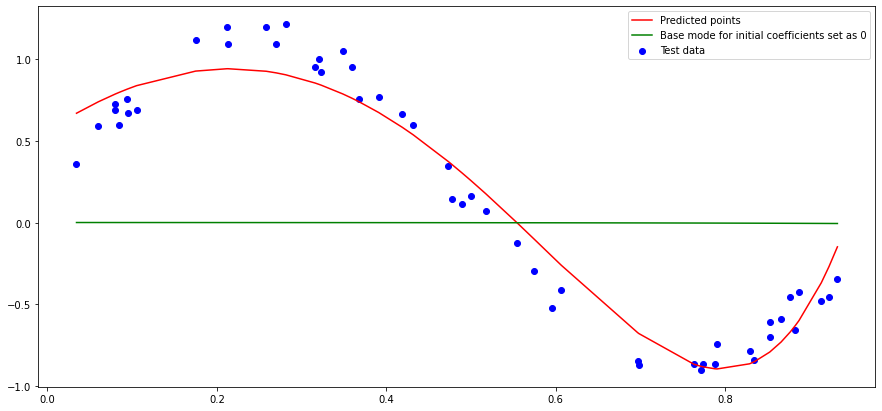

In [103]:
n=100
def calc_grad1(init_coeff, X_test, Y_test):
  a_s =[]
  b_s =[]
  c_s =[]
  d_s =[]
  e_s =[]
  f_s =[]
  g_s =[]
  h_s =[]
  i_s =[]
  
  new_f = np.poly1d(init_coeff)
  # print(new_f)
  grad_y = []
  for i in range(len(X_test)):
    grad_y.append(new_f(X_test[i]))
  
  for x,y,y_bar in list(zip(X_test, Y_test, grad_y)):
    a_s.append(x**8 * (y-y_bar))
    b_s.append(x**7 * (y-y_bar))
    c_s.append(x**6 * (y-y_bar))
    d_s.append(x**5 * (y-y_bar))
    e_s.append(x**4 * (y-y_bar))
    f_s.append(x**3 * (y-y_bar))
    g_s.append(x**2 * (y-y_bar))
    h_s.append(x**1 * (y-y_bar))
    i_s.append((y-y_bar))
  
  gradient_a = (-2 / n) * sum(a_s)
  gradient_b = (-2 / n) * sum(b_s)
  gradient_c = (-2 / n) * sum(c_s)
  gradient_d = (-2 / n) * sum(d_s)
  gradient_e = (-2 / n) * sum(e_s)
  gradient_f = (-2 / n) * sum(f_s)
  gradient_g = (-2 / n) * sum(g_s)
  gradient_h = (-2 / n) * sum(h_s)
  gradient_i = (-2 / n) * sum(i_s)

  return(gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f, gradient_g, gradient_h, gradient_i)


calc_grad = calc_grad1(init_coeff,X_test,y_pred) 

lr = 0.01
a_new = init_coeff[0] - lr * calc_grad[0]
b_new = init_coeff[1] - lr * calc_grad[1]
c_new = init_coeff[2] - lr * calc_grad[2]
d_new = init_coeff[3] - lr * calc_grad[3]
e_new = init_coeff[4] - lr * calc_grad[4]
f_new = init_coeff[5] - lr * calc_grad[5]
g_new = init_coeff[6] - lr * calc_grad[6]
h_new = init_coeff[7] - lr * calc_grad[7]
i_new = init_coeff[8] - lr * calc_grad[8]

new_coeff = [a_new, b_new, c_new, d_new, e_new, f_new, g_new, h_new, i_new]
print(new_coeff)

f_updated = np.poly1d(new_coeff)

last_y = []
for i in range(len(Y_test)):
  last_y.append(f_updated(X_test[i]))

new_loss = 0
for i in range(len(Y_test)):
  new_loss = new_loss + (Y_test[i]- last_y[i])**2

new_loss = new_loss/len(Y_test)

test_pd2 = pd.DataFrame(data = [X_test, y_pred], index=['x', 'y']).T.sort_values(by='x')
test_pd3 = pd.DataFrame(data = [X_test, last_y], index=['x', 'y']).T.sort_values(by='x')

fig, axes = plt.subplots(1,1, figsize=(15,7))

axes.scatter(X_test,Y_test, color = 'blue')
axes.plot(test_pd2['x'],test_pd2['y'], color = 'red')
axes.plot(test_pd3['x'],test_pd3['y'], color='green')
axes.legend(['Predicted points', 'Base mode for initial coefficients set as 0', 'Test data'])

In [104]:
def calc_grad1(init_coeff, x, y, lr):
  a_s =[]
  b_s =[]
  c_s =[]
  d_s =[]
  e_s =[]
  f_s =[]
  g_s =[]
  h_s =[]
  i_s =[]
  
  new_f = np.poly1d(init_coeff)
  grad_y = []
  for i in range(len(x)):
    grad_y.append(new_f(x[i]))
  for x,y,y_bar in list(zip(x, y, grad_y)):
    

    a_s.append(x**8 * (y-y_bar))
    b_s.append(x**7 * (y-y_bar))
    c_s.append(x**6 * (y-y_bar))
    d_s.append(x**5 * (y-y_bar))
    e_s.append(x**4 * (y-y_bar))
    f_s.append(x**3 * (y-y_bar))
    g_s.append(x**2 * (y-y_bar))
    h_s.append(x**1 * (y-y_bar))
    i_s.append((y-y_bar))
  
  gradient_a = (-2 / n) * sum(a_s)
  gradient_b = (-2 / n) * sum(b_s)
  gradient_c = (-2 / n) * sum(c_s)
  gradient_d = (-2 / n) * sum(d_s)
  gradient_e = (-2 / n) * sum(e_s)
  gradient_f = (-2 / n) * sum(f_s)
  gradient_g = (-2 / n) * sum(g_s)
  gradient_h = (-2 / n) * sum(h_s)
  gradient_i = (-2 / n) * sum(i_s)

  calc_grad = [gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f, gradient_g, gradient_h, gradient_i]

  a_new = init_coeff[0] - lr * calc_grad[0]
  b_new = init_coeff[1] - lr * calc_grad[1]
  c_new = init_coeff[2] - lr * calc_grad[2]
  d_new = init_coeff[3] - lr * calc_grad[3]
  e_new = init_coeff[4] - lr * calc_grad[4]
  f_new = init_coeff[5] - lr * calc_grad[5]
  g_new = init_coeff[6] - lr * calc_grad[6]
  h_new = init_coeff[7] - lr * calc_grad[7]
  i_new = init_coeff[8] - lr * calc_grad[8]

  new_coeff = [a_new, b_new, c_new, d_new, e_new, f_new, g_new, h_new, i_new]

  return new_coeff


In [105]:
coeff = calc_grad1(init_coeff,X_test,Y_test,0.1)
print(coeff)

[-0.005661406770323878, -0.006678134051433482, -0.007911540572452238, -0.009396230448160776, -0.011128649026689287, -0.012946577075525377, -0.014081061398102552, -0.011179111799573987, 0.013796743537192594]


In [106]:
for i in range(100000):
  coeff = calc_grad1(coeff,X_test,Y_test,0.1)

print(coeff)

[-0.8729242758452674, 1.5568044450088083, 3.3882704518767754, 3.743895265457412, 1.434207025272281, -4.185116148446433, -9.243897155124762, 4.802357586741054, 0.4182021051012866]


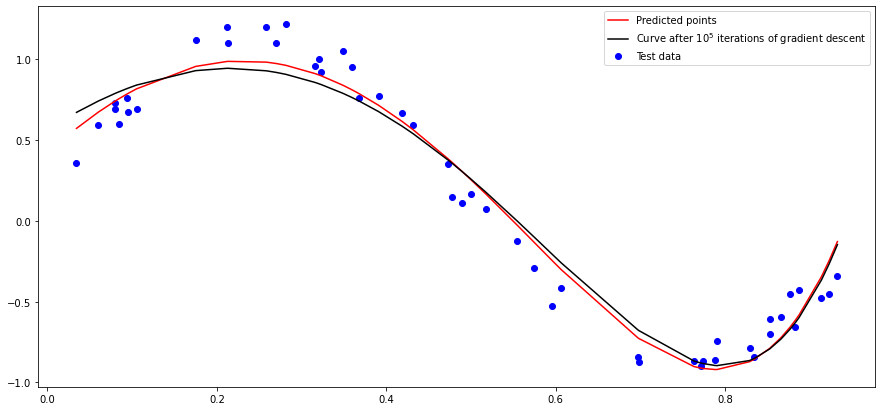

In [107]:
new_f = np.poly1d(coeff)

grad_y = []
for i in range(len(Y_test)):
  grad_y.append(new_f(X_test[i]))

test_pd4 = pd.DataFrame(data = [X_test, grad_y], index=['x', 'y']).T.sort_values(by='x')
test_pd5 = pd.DataFrame(data = [X_test, last_y], index=['x', 'y']).T.sort_values(by='x')
test_pd6 = pd.DataFrame(data = [X_test, y_pred], index=['x', 'y']).T.sort_values(by='x')

fig, axes = plt.subplots(1,1, figsize=(15,7))

axes.scatter(X_test,Y_test, color='blue')
axes.plot(test_pd4['x'],test_pd4['y'], color='red')
axes.plot(test_pd6['x'],test_pd6['y'], color='black')
axes.legend(['Predicted points', 'Curve after $10^5$ iterations of gradient descent', 'Test data'])

In [108]:
# MAE - Mean Absolute Error

MAE = 0
for i in range(len(y_pred)):
    MAE = MAE + abs(Y_test[i] - y_pred[i])
MAE = MAE/len(Y_test)
print("MEAN ABSOLUTE ERROR IS ", MAE)

  # MSE - Mean Squared Error

MSE = 0
for i in range(len(y_pred)):
    MSE = MSE + (Y_test[i] - y_pred[i])**2
MSE = MSE/len(y_pred)
print("MEAN SQUARED ERROR IS ", MSE)

  # RMSE - Mean Squared Error

RMSE = 0
for i in range(len(y_pred)):
    RMSE = RMSE + (Y_test[i] - y_pred[i])**2

RMSE = (RMSE/len(y_pred))**(1/2)
print("ROOT MEAN SQUARED ERROR IS ", RMSE)

  # NMSE - Normalized Mean Squared Error
  
NMSE = 0
avg_y = sum(Y_test)/len(y_pred)
up = 0
down = 0
for i in range(len(y_pred)):
    up = up + (Y_test[i] - y_pred[i])**2
    down = down + (Y_test[i] - avg_y)**2
NMSE = up/down
print("NORMALIZED ROOT MEAN SQUARED ERROR IS ", NMSE)

MEAN ABSOLUTE ERROR IS  0.13962932105032413
MEAN SQUARED ERROR IS  0.026268039677766503
ROOT MEAN SQUARED ERROR IS  0.16207417955296427
NORMALIZED ROOT MEAN SQUARED ERROR IS  0.048834100074294264


# 5. Estimate the regularized Least Squares Polynomial Regression model of order M= 9 on the training set T using stochastic gradient descent method with the tuned value of λ obtained in question 3 by selecting an appropriate step lengths ηi. Compare the solution with the solution obtained by the direct method and gradient descent method. Evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

# Also obtain the norm of the obtained gradient at each iteration (epoch) of stochastic gradient descent method and plot it.

## Training and Testing set values

In [109]:
x_train = np.sort(np.random.uniform(0,1 , 100))
x_test =  np.sort(np.random.uniform(0,1,50))

def normal_dist(x , mean = 0, sd = 0.25):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

def func(x,si):
  return(np.sin(6.28*x)+si)


y_train=[]

for i in range(100):
  y_train.append(func(x_train[i],normal_dist(x_train[i])))
 
y_test=[]

for i in range(50):
  y_test.append(func(x_test[i],normal_dist(x_test[i])))
y_test

[0.8038031563412833,
 0.9239981346236908,
 0.9849372174839428,
 1.294684216162382,
 1.2963248432664827,
 1.3133546570558723,
 1.4176145807510392,
 1.4253498066845323,
 1.4548730137278418,
 1.5061877623198021,
 1.5079077632619602,
 1.519198517063026,
 1.52084513307692,
 1.2968088259654582,
 1.2796326887958398,
 0.7952819714405717,
 0.5686844910802374,
 0.5257493998744387,
 0.48688471987205995,
 0.4274459917839771,
 0.2469978640405909,
 0.23870938284415946,
 0.18805680484487686,
 0.12233673833902838,
 0.06513061785831656,
 -0.15921695988235837,
 -0.28249529668874696,
 -0.28804329260463046,
 -0.33937732559020084,
 -0.5635931753390611,
 -0.6215462449687269,
 -0.6619224844738774,
 -0.6977032125507232,
 -0.7376941838541997,
 -0.7881254765799998,
 -0.8114059430545989,
 -0.8617611487159005,
 -0.957750046833299,
 -0.9731228693382447,
 -0.981729548503416,
 -0.9890742819999516,
 -0.9494831489354476,
 -0.9463523445646075,
 -0.8399292552478254,
 -0.6912910243721374,
 -0.3659718460919085,
 -0.223900

In [110]:
U=np.zeros(10)

def matrixA(m,training_set):
  A=[]
  for i in range(len(training_set)):
    A.append([])
    for j in reversed(range(m+1)):
      A[i].append((training_set[i])**j)
  return A

M9_train = matrixA(9, x_train)
M9_test = matrixA(9, x_test)

def fun_y_cap(train_mat,co_mat):
  y_cap=[]
  y_cap.append(np.dot(train_mat,co_mat))
  return y_cap

# min-max normalization
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [111]:
step_size = 0.01
Lamda = math.pow(2, -7)

for i in range(200):
  
  for j in range(len(U)):
    p1=0
    k=10
    for kz in range(10):      
      NormalizeData(U)
      y_trainl=y_train[p1:k]
      val=np.dot(Lamda,U) - np.dot(np.transpose(M9_train[p1:k]), (y_train[p1:k]-np.dot(M9_train[p1:k], U)))  
      
      p1 = p1+10
      k = k+10
      U = U-np.dot(step_size,val)
  M9_U=U

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


## Testing set Stochastic Gradient Descent

In [112]:
step_size=0.01
Lamda = math.pow(2, -7)

for i in range(200):  
  for j in range(len(U)):
    p1 = 0
    k = 10
    for kz in range(10):      
      NormalizeData(U)
      val = np.dot(Lamda, U) - np.dot(np.transpose(M9_test[p1:k]), (y_test[p1:k] - np.dot(M9_test[p1:k], U)))  
      
      p1 = p1+5
      k = k+5
      U = U - np.dot(step_size,val)
  M9_test_U=U

In [113]:
M9_y_pred=np.transpose(fun_y_cap(M9_train, M9_U))
M9_y_pred_t=np.transpose(fun_y_cap(M9_test,M9_test_U))

## RMSE

In [114]:
def fun_rmse(y_pred,y_train):
  sum=0
  for i in range(100):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sum = sum + mt_minus
  error=np.sqrt(sum/100)
  return error


def fun_rmse_t(y_pred,y_train):
  sum=0
  for i in range(50):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sum = sum + mt_minus
  error=np.sqrt(sum/50)
  return error

M9_rmse=fun_rmse(M9_y_pred,y_train)
print(f'RMSE for train data: {M9_rmse}')

M9_rmse_t=fun_rmse_t(M9_y_pred_t,y_test)
print(f'RMSE for test data: {M9_rmse_t}')

RMSE for train data: [0.23334446]
RMSE for test data: [0.23020769]


## NMSE

In [115]:
def fun_nmse(y_pred,y_train):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred)
  for i in range(100):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sumup = sumup + mt_minus
    ym=np.mean(y_pred)
    sumlo = sumlo + ((ym-y_pred[i])**2)
  error=sumup/sumlo
  return error


def fun_nmse_t(y_pred_t,y_test):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred_t)
  for i in range(50):
    mt_minus=(y_pred_t[i]-y_train[i]) ** 2
    sumup = sumup + mt_minus
    ym=np.mean(y_pred_t)
    sumlo = sumlo + ((ym-y_pred_t[i])**2)
  error=sumup/sumlo
  return error

M9_nmse=fun_nmse(M9_y_pred,y_train)
print(f'Training rmse: {M9_nmse}')

M9_nmse_t=fun_nmse_t(M9_y_pred_t,y_test)
print(f'training_rmse: {M9_nmse_t}')

Training rmse: [0.07954406]
training_rmse: [1.91090138]


## MAE

In [116]:
def fun_mae(y_pred,y_train):
  sum=0
  for i in range(100):
    mt_minus=abs(y_pred[i]-y_train[i])
    sum = sum + mt_minus
  error=sum/100
  return error

def fun_mae_t(y_pred,y_test):
  sum=0
  for i in range(50):
    mt_minus=abs(y_pred[i]-y_test[i])
    sum = sum + mt_minus
  error=sum/50
  return error

M9_mae=fun_mae(M9_y_pred,y_train)
print(f'MAE for train data: {M9_mae}')

M9_mae_t=fun_mae_t(M9_y_pred,y_test)
print(f'MAE for trest data: {M9_mae_t}')

MAE for train data: [0.20371113]
MAE for trest data: [0.83561047]


## R-Square Error

In [117]:
def fun_r2(y_pred,y_train):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred)
  for i in range(100):
    ym1=np.mean(y_train)
    sumup = sumup + ((ym1-y_pred[i])**2)
    ym=np.mean(y_pred)
    sumlo = sumlo + ((ym-y_pred[i])**2)
  error=sumup/sumlo
  return error

def fun_r2_t(y_pred,y_test):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred)
  for i in range(50):
    ym1=np.mean(y_test)
    sumup = sumup + ((ym1-y_pred[i])**2)
    ym=np.mean(y_pred)
    sumlo = sumlo + ((ym-y_pred[i])**2)
  error=sumup/sumlo
  return error

M9_r2=fun_r2(M9_y_pred,y_train)
print(f'R-Square error for train: {M9_r2}')

M9_r2_t=fun_r2_t(M9_y_pred,y_test)
print(f'R_square error for test: {M9_r2_t}')

R-Square error for train: [1.00008235]
R_square error for test: [1.1937598]


## Plots for Training data and Testing data

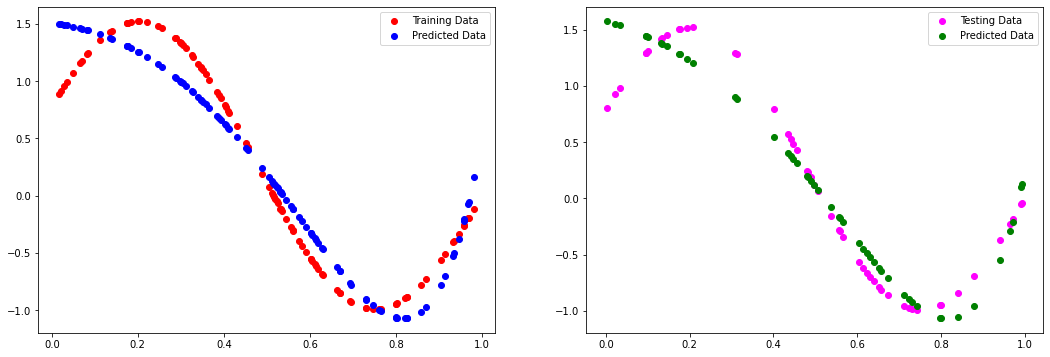

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].scatter(x_train,y_train, color='red', label='Training Data')
axes[0].scatter(x_train, M9_y_pred, color='blue', label='Predicted Data')
axes[0].legend(['Training Data', 'Predicted Data'])

axes[1].scatter(x_test,y_test,  color='magenta', label='Testing data')
axes[1].scatter(x_test,M9_y_pred_t,  color='green', label='Predicted Data')
axes[1].legend(['Testing Data', 'Predicted Data'])

# 6. Estimate the regularized Least Squares Kernel Regression model by using the Gaussian (RBF) kernel which is given by

# K ($x_i$, $x_j$) = e$\frac{−||x_i − x_j||^2}{σ^2}$


# Also, tune the value of the regularization parameter λ and kernel parameter σ and obtain the best possible estimate using NMSE, RMSE, MAE and R2 on test set.

In [119]:
def get_kernel(xi,xj,sigma):
  kernel=math.exp(-(np.linalg.norm(xi-xj)**2)/sigma**2)
  return kernel  

In [120]:
def get_weights(x,y,sigma,lambd):
  kernels=np.zeros((len(x),len(x)+1))
  weights=np.zeros(len(x)+1)
  for i in range(len(x)):
    for j in range(len(x)):
      kernels[i,j] = get_kernel(x[i],x[j],sigma)
  #Adding Bias
  kernels[:,len(x):len(x)+1]=1
  identity=np.identity(kernels.shape[1])
  weights=np.linalg.inv((kernels.T).dot(kernels)+lambd*identity).dot((kernels.T).dot(y))
  return [weights,kernels]

In [121]:
def get_test_kernel(x,test_x,w,sigma):
  kernel2=np.zeros([len(test_x),len(x)+1])
  y_predicted=np.zeros(len(test_x))
  for i in range(len(test_x)):
    for j in range(len(x)):
      kernel2[i,j]=get_kernel(x[j],test_x[i],sigma)
  kernel2[:,len(x):len(x)+1]=1        
  return kernel2


In [122]:
def get_rms_kernel(kernel2,y,w): 
  y_predicted=np.dot(kernel2,w)
  rms=((np.sum((y_predicted-y)**2))/len(y))**0.5
  return [rms,y_predicted]

In [123]:
sigma=0.2
lambd=0.0001
[weight, train_kernel] = get_weights(X_train, Y_train,sigma,lambd)
test_kernel=get_test_kernel(X_train,X_test,weight,sigma)
[rms_kernel,y_predicted_kernel]=get_rms_kernel(test_kernel,Y_test,weight)
print("Predicted values for direct kernel")
print(y_predicted_kernel)
print("rms for direct kernel:",rms_kernel)

Predicted values for direct kernel
[ 0.76811815 -0.5788465  -0.52694602 -0.84483085  0.65161557  0.71430467
  1.1313706  -0.54875641 -0.34282135  0.51085949  0.82172712 -0.51567539
  1.03510903  0.90252773  1.12393323 -0.22020178  1.11362241 -0.84187152
 -0.86040313 -0.85621813  1.14364931  0.28308317 -0.63020556  1.02402493
  0.85777072  0.72178619  0.65192281  0.5489567  -0.85750875 -0.74951979
  1.0066684   0.57715918 -0.81120459  0.67275156 -0.68640924  0.25877831
 -0.45895703  0.99840468 -0.38202586 -0.33000065 -0.76652717 -0.27375166
  0.12605298 -0.68634952  0.71289841 -0.81362433  0.01507554  1.12205252
  0.40483125  0.18857886]
rms for direct kernel: 0.07414316883917858


In [124]:
def get_mae_kernel(kernel2,y,w): 
  y_predicted=np.dot(kernel2,w)
  mae=(np.sum(np.absolute((y_predicted-y))))/len(y)
  return [mae,y_predicted]

In [125]:
sigma=0.2
lambd=0.0001
[weight,train_kernel]=get_weights(X_train,Y_train,sigma,lambd)
test_kernel=get_test_kernel(X_train,Y_test,weight,sigma)
[mae_kernel,y_predicted_kernel]=get_mae_kernel(test_kernel,Y_test,weight)
print("Predicted values for direct kernel")
print(y_predicted_kernel)
print("mae for direct kernel:",mae_kernel)

Predicted values for direct kernel
[-0.80107423 -1.53017721 -1.5285793  -1.53130214 -0.85038408 -0.86093814
 -0.15695686 -1.53130529 -1.46084219 -0.46022632 -0.86087522 -1.52730991
 -0.27718192  0.02074816 -0.15480309 -0.75853185 -0.98090815 -1.53130237
 -1.53130214 -1.53130214 -0.83586984  0.89528063 -1.53131054 -0.14742402
 -0.16068896 -0.75622928 -0.79975192 -0.43281251 -1.53130214 -1.53130214
  0.02151165 -0.74935605 -1.53130214 -0.46448023 -1.53130306  0.93494402
 -1.53123688 -0.34078933 -1.53077749 -1.53008177 -1.53130219 -1.50657087
  0.99888383 -1.53130994 -0.8576899  -1.53130214  0.62535058 -0.86711971
  0.85739052  0.79897248]
mae for direct kernel: 1.0836533198550051


In [126]:
from sklearn.metrics import r2_score

def get_r2_kernel(kernel2,y,w): 
  y_predicted=np.dot(kernel2,w)
  r2_score1=r2_score(y_predicted,y)
  return [r2_score1,y_predicted]

In [127]:
sigma=0.2
lambd=0.0001
[weight,train_kernel]=get_weights(X_train,Y_train,sigma,lambd)
test_kernel=get_test_kernel(X_train,X_test,weight,sigma)
[r2_kernel,y_predicted_kernel]=get_r2_kernel(test_kernel,Y_test,weight)
print("Predicted values for direct kernel")
print(y_predicted_kernel)
print("r2 score for direct kernel:",r2_kernel)

Predicted values for direct kernel
[ 0.76811815 -0.5788465  -0.52694602 -0.84483085  0.65161557  0.71430467
  1.1313706  -0.54875641 -0.34282135  0.51085949  0.82172712 -0.51567539
  1.03510903  0.90252773  1.12393323 -0.22020178  1.11362241 -0.84187152
 -0.86040313 -0.85621813  1.14364931  0.28308317 -0.63020556  1.02402493
  0.85777072  0.72178619  0.65192281  0.5489567  -0.85750875 -0.74951979
  1.0066684   0.57715918 -0.81120459  0.67275156 -0.68640924  0.25877831
 -0.45895703  0.99840468 -0.38202586 -0.33000065 -0.76652717 -0.27375166
  0.12605298 -0.68634952  0.71289841 -0.81362433  0.01507554  1.12205252
  0.40483125  0.18857886]
r2 score for direct kernel: 0.9893777095712798


In [128]:
def get_nmse_kernel(kernel2,y,w): 
  y_predicted=np.dot(kernel2,w)
  NMSE = 0
  avg_y = sum(y)/len(y)
  up = 0
  down = 0
  for i in range(len(y)):
    up = up + (y[i] - y_predicted)**2
    down = down + (y[i] - avg_y)**2
  NMSE = up/down
  return [NMSE,y_predicted]

In [129]:
sigma=0.2
lambd=0.0001
[weight,train_kernel]=get_weights(X_train,Y_train,sigma,lambd)
test_kernel=get_test_kernel(X_train,X_test,weight,sigma)
[NMSE_kernel,y_predicted_kernel]=get_mae_kernel(test_kernel,Y_test,weight)
print("Predicted values for direct kernel")
print(y_predicted_kernel)
print("NMSE for direct kernel:",NMSE_kernel)

Predicted values for direct kernel
[ 0.76811815 -0.5788465  -0.52694602 -0.84483085  0.65161557  0.71430467
  1.1313706  -0.54875641 -0.34282135  0.51085949  0.82172712 -0.51567539
  1.03510903  0.90252773  1.12393323 -0.22020178  1.11362241 -0.84187152
 -0.86040313 -0.85621813  1.14364931  0.28308317 -0.63020556  1.02402493
  0.85777072  0.72178619  0.65192281  0.5489567  -0.85750875 -0.74951979
  1.0066684   0.57715918 -0.81120459  0.67275156 -0.68640924  0.25877831
 -0.45895703  0.99840468 -0.38202586 -0.33000065 -0.76652717 -0.27375166
  0.12605298 -0.68634952  0.71289841 -0.81362433  0.01507554  1.12205252
  0.40483125  0.18857886]
NMSE for direct kernel: 0.06639264954499598


# 7. Estimate the regularized Least Squares Kernel Regression model by using the Gaussian (RBF) kernel with stochastic gradient descent method. Make use of the tuned value of regularization parameter λ and kernel parameter σ of question 6. Compare the obtained solution with the solution obtained at question 6.

## Training and Test set values

In [130]:
x_train = np.sort(np.random.uniform(0,1,100))
x_test =  np.sort(np.random.uniform(0,1,50))

def normal_dist(x , mean = 0, sd = 0.25):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

def func(x,si):
  return(np.sin(6.28*x)+si)

y_train=[]

for i in range(100):
  y_train.append(func(x_train[i],normal_dist(x_train[i])))
 
y_test=[]

for i in range(50):
  y_test.append(func(x_test[i],normal_dist(x_test[i])))
y_test

[1.0432722021490448,
 1.1996861334191409,
 1.3371663036612973,
 1.3439126943186221,
 1.345869137411399,
 1.4055970804386262,
 1.419716526661774,
 1.4858079846361674,
 1.496483983465985,
 1.5134437617918548,
 1.4979127497196134,
 1.4489305125351895,
 1.383225056278537,
 1.3261138087347255,
 1.2857829196505681,
 1.2182233323406093,
 1.208404897598216,
 0.9841586122308326,
 0.8535179915522976,
 0.8099186754902408,
 0.7802263437567516,
 0.687546850530184,
 0.5752605115689711,
 0.4657242500453574,
 0.2280427322781261,
 0.0809243374350701,
 0.033218577017672654,
 0.0015919476633435847,
 -0.12792321816970248,
 -0.612906386764746,
 -0.7282874371266694,
 -0.7828304143359692,
 -0.8121006078230779,
 -0.8345441395766672,
 -0.8970773977377157,
 -0.9293842354952201,
 -0.9910704807469474,
 -0.9830100950721982,
 -0.9623009058557349,
 -0.9454760480699053,
 -0.9111152117316585,
 -0.8992681939881011,
 -0.8152064578815851,
 -0.7768499645169665,
 -0.7683610248627866,
 -0.7544373214505546,
 -0.7392712327438

In [133]:
U=np.zeros(101)
U1=np.zeros(51)

def fun_matrixA(training_set):
  M=[]
  sigma=0.5
  for i in range(len(training_set)):
    M.append([])
    for j in range(len(training_set)):
      arr = np.array([training_set[i],training_set[j]])
      norm_l2 = norm(arr)
      M[i].append(np.exp(-((norm_l2)/(sigma**2))))
  return M 

def NormalizeData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))


# Function Matrix
M9= fun_matrixA(x_train)

X0=np.ones((len(x_train),1))

M9=np.hstack((M9,X0))

M9_t=fun_matrixA(x_test)
X01 = np.ones((len(x_test),1))
M9_t = np.hstack((M9_t,X01))

M=np.array(M9)

## Gradient Descent

In [134]:
# Gradient Descent Training Set
eta=0.01
lamda=0.0078125
for i in range(2):
  for j in range(len(U)):
    p1=0
    k=10
    for kz in range(10):      
      NormalizeData(U)
      y_trainl = y_train[p1:k]
      val=np.dot(lamda,U)-np.dot(np.transpose(M9[p1:k]),(y_train[p1:k]-np.dot(M9[p1:k],U)))  
      
      p1 = p1+10
      k = k+10
      U=U-np.dot(eta,val)
  M9_U=U
print(M9_U)


# Gradient Descent Testing Set
eta=0.02
lamda=0.0078125
for i in range(2):  
  for j in range(len(U)):
    p1 = 0
    k = 10 
    for kz in range(5):      
      NormalizeData(U1)

      val = np.dot(lamda,U1) - np.dot(np.transpose(M9_t[p1:k]), (y_test[p1:k] - np.dot(M9_t[p1:k], U1)))
      
      p1 = p1 + 5
      k = k + 5
      U1 = U1 - np.dot(eta,val)
  M9_U_t=U1
print(M9_U_t)

[-0.96851108 -0.91806537 -0.67590085 -0.65654264 -0.57076346 -0.49408307
 -0.43010472 -0.03545234 -0.0123659   0.12147818  0.19298702  0.25563113
  0.33262978  0.42758611  0.44978325  0.47247579  0.48336903  0.48958169
  0.50700788  0.5183796   0.53324748  0.53898911  0.53945188  0.54201912
  0.54184076  0.53802829  0.53659542  0.53466422  0.53137592  0.52976812
  0.52726413  0.52609179  0.49956447  0.4844752   0.47666601  0.44037706
  0.4342698   0.39488647  0.38392214  0.38114942  0.29580681  0.28786248
  0.27392305  0.2638204   0.25923147  0.25690353  0.24697093  0.21592887
  0.21220533  0.2052749   0.19798352  0.19722282  0.1900914   0.18782273
  0.18572091  0.17883511  0.16911831  0.16424619  0.1533251   0.1456186
  0.1256574   0.12147941  0.11934411  0.10393299  0.10003523  0.09262063
  0.07862914  0.07687487  0.07639346  0.07398064  0.06972242  0.06806376
  0.06619082  0.06329444  0.05282796  0.0521602   0.04831861  0.04809138
  0.04662958  0.04340327  0.03084987  0.02385324  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [135]:
def fun_y_cap(train_mat,co_mat):
  y_cap=[]
  y_cap.append(np.dot(train_mat,co_mat))
  return y_cap


In [136]:
M9_y_pred=np.transpose(fun_y_cap(M9,M9_U))
M9_y_pred_t=np.transpose(fun_y_cap(M9_t,M9_U_t))

## RMSE

In [137]:
def fun_rmse(y_pred,y_train):
  sum=0
  for i in range(100):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sum = sum + mt_minus
  error=np.sqrt(sum/100)
  return error


def fun_rmse_t(y_pred,y_train):
  sum=0
  for i in range(50):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sum = sum + mt_minus
  error=np.sqrt(sum/50)
  return error

In [138]:

M9_rmse=fun_rmse(M9_y_pred,y_train)

print(M9_rmse)

M9_rmse_t=fun_rmse_t(M9_y_pred_t,y_test)

print(M9_rmse_t)


[0.31908159]
[0.51767663]


## NMSE

In [139]:
def fun_nmse(y_pred,y_train):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred)
  for i in range(100):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sumup = sumup + mt_minus
    ym=np.mean(y_pred)
    sumlo = sumlo + ((ym-y_pred[i])**2)
  error=sumup/sumlo
  return error


def fun_nmse_t(y_pred_t,y_test):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred_t)
  for i in range(50):
    mt_minus=(y_pred_t[i]-y_train[i]) ** 2
    sumup = sumup + mt_minus
    ym=np.mean(y_pred_t)
    sumlo = sumlo + ((ym-y_pred_t[i])**2)
  error=sumup/sumlo
  return error

In [140]:
M9_nmse=fun_nmse(M9_y_pred,y_train)

print("training_nmse: ",M9_nmse)

M9_nmse_t=fun_nmse_t(M9_y_pred_t,y_test)

print("testing_nmse: ",M9_nmse_t)

training_nmse:  [0.13693031]
testing_nmse:  [1.5373145]


## MAE

In [141]:
def fun_mae(y_pred,y_train):
  sum=0
  for i in range(100):
    mt_minus=abs(y_pred[i]-y_train[i])
    sum = sum + mt_minus
  error=sum/100
  return error

def fun_mae_t(y_pred,y_test):
  sum=0
  for i in range(50):
    mt_minus=abs(y_pred[i]-y_test[i])
    sum = sum + mt_minus
  error=sum/50
  return error

In [142]:
M9_mae=fun_mae(M9_y_pred,y_train)

print(M9_mae)

M9_mae_t=fun_mae_t(M9_y_pred,y_test)

print(M9_mae_t)

[0.26261178]
[0.85743597]


## R_Square

In [143]:
def fun_r2(y_pred,y_train):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred)
  for i in range(100):
    ym1=np.mean(y_train)
    sumup = sumup + ((ym1-y_pred[i])**2)
    ym=np.mean(y_pred)
    sumlo = sumlo + ((ym-y_pred[i])**2)
  error=sumup/sumlo
  return error

def fun_r2_t(y_pred,y_test):
  sumup=0
  sumlo=0
  y_pred1=np.array(y_pred)
  for i in range(50):
    ym1=np.mean(y_test)
    sumup = sumup + ((ym1-y_pred[i])**2)
    ym=np.mean(y_pred)
    sumlo = sumlo + ((ym-y_pred[i])**2)
  error=sumup/sumlo
  return error

In [144]:
M9_r2=fun_r2(M9_y_pred,y_train)

print(M9_r2)

M9_r2_t=fun_r2_t(M9_y_pred,y_test)

print(M9_r2_t)

[1.00085129]
[1.09562179]


## Training data plot

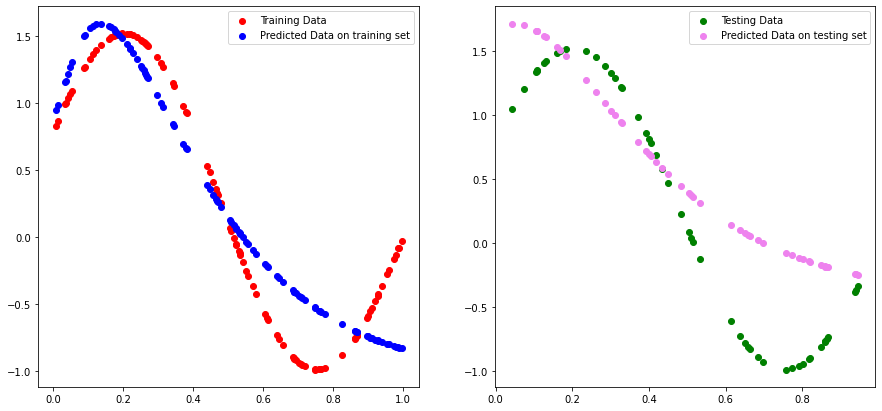

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

axes[0].scatter(x_train,y_train, color='red', label='original')
axes[0].scatter(x_train, M9_y_pred, color='blue', label='predicted')
axes[0].legend(['Training Data', 'Predicted Data on training set'])

axes[1].scatter(x_test,y_test,  color='green', label='original')
axes[1].scatter(x_test,M9_y_pred_t,  color='violet', label='predicted')
axes[1].legend(['Testing Data', 'Predicted Data on testing set'])

# 8. Modify the training set T by picking up randomly 5 data points from the training set T and scale their yi values by 20. Now, find the estimate of Least Squares Polynomial Regression model of order M= 9 with modified training set. Plot the estimated function along with data points of modified training set. Also, write down your observations.

In [ ]:
Y_pred_stochastic_kernel=np.dot(rbf_array,U_stochastic_kernel)
  U_stochastic_kernel=U_stochastic_kernel-((0.0001)*(Y_pred_stochastic_kernel[i]-Y_training[i])*rbf_array[i])
[ ]
Y_pred_stochastic_kernel=np.dot(rbf_array,U_stochastic_kernel)
print(Y_pred_stochastic_kernel) 

[ ]
root_mean_squared_error(Y_training,Y_pred_stochastic_kernel)
0.4542355124549967
[ ]
mae(Y_training,Y_pred_stochastic_kernel)
0.38513182309765226
[ ]
mean_square(Y_training,Y_pred_stochastic_kernel)

0.20632990077525346
[ ]
r_squared_error(Y_training,Y_pred_stochastic_kernel)

0.8515184218987184
[ ]
NMSE_fun(Y_training,Y_pred_stochastic_kernel)
0.20859632053842903
8. Modify the training set T by picking up randomly 5 data points from the training set T and scale their yi values by 20. Now, find the estimate of Least Squares Polynomial Regression model of order M= 9 with modified training set. Plot the estimated function along with data points of modified training set. Also, write down your observations.
[ ]
train_set=np.c_[X_training,Y_training]
train_set=pd.DataFrame(train_set)
[ ]
sample_train_set=train_set.sample(n=5)
[ ]
sample_train_set[1]=4*sample_train_set[1]
[ ]
sample_train_set

[ ]
train_set.loc[sample_train_set.index,:]=sample_train_set[:]
[ ]
x=train_set[0]
y=train_set[1]
[ ]
plt.scatter(x,y)

[ ]
A=(np.vstack([pow(x,9),pow(x,8),pow(x,7),pow(x,6),pow(x,5),pow(x,4),pow(x,3),pow(x,2),x,np.ones(len(x))]))
[ ]
A=A.T
[ ]
U=np.dot(np.linalg.pinv(np.dot(A.T,A)),np.dot((A.T),y))
[ ]
Y_pred=np.dot(A,U)
[ ]
plt.scatter(x,y)
plt.scatter(x,Y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[ ]
root_mean_squared_error(y,Y_pred)
0.546620266636204
We can see scaling causes outliers, and they are unable to fit to curve